In [1]:
# Paths
# -----
# load and save folder. all coordinate and image data must be in the load folder ()
# if there is already analyses for a mosaic that you want to add analyses to, it must 
# be located in the save file the same name as the coordinate file but with the save file-type
data_path = 'C:\\Users\\schle\Documents\\GitHub\\Incubator-2022-Geometry-of-Color\\CSV data all OCT locs Jan 2022\\'
save_path = 'Z:\\Sierra\\Incubator Data Pass\\'

# settings that define the files that will be searched for in the load folder above.
# processes indicated below will be run on all such files found. 
subject = ['AO001R', 'AO008R']
angle = ['temporal', 'nasal', 'superior', 'inferior']
eccentricity = ['1.5','3.5', '4', '4.5', '10']
conetype = ['all','L','M','S','unclassed']
conetype_color = ['y','r','g','b','w']
coord_unit = 'pixels' # units of the coordinate data loaded in - any string you want

# Run settings
# ------------
# select single-mosaic processes to run
# options: 'basic stats', 'intracone_dists', 'monteCarlo_Uniform', 'monteCarlo_coneLocked
# proc_to_run = {
#      'intracone_dist', 
#      'monteCarlo_uniform', 
#      'monteCarlo_uniform_intracone_dist', 
#      'monteCarlo_coneLocked',
#      'monteCarlo_coneLocked_intracone_dist',
#      'norm_by_MCU_mean'}
proc_to_run = {'norm_by_MCU_mean'}
    
# indicate whether all processes requested will be run on all mosaics found fitting the inputs above,
# or processes will only be run for a file if that process' outputs are not present in an identified save file
data_to_run = 'all' # 'all', absent_only

# Process-specific Settings
# -------------------------
# intracone distance settings
dist_area_norm = False # bool

num_mc = 1000

import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import os
import h5py
import importlib
import glob
import yaml
import sys

import mosaic_topog.utilities as util
import mosaic_topog.flsyst as flsyst
import mosaic_topog.show as show
import mosaic_topog.calc as calc
import mosaic_topog.singleMosaicProcesses as smp

subject = np.asarray(subject)
angle = np.asarray(angle)
eccentricity = np.asarray(eccentricity)

single_mosaic_savefl_config = 'savefl_config.yml'

coord_fltype = '.csv'
img_fltype = '.png'
filetypes = [coord_fltype, img_fltype]

conetype_sizes = [10, 10, 10, 30]

bin_width = 10

categories = [subject, angle, eccentricity]


# set up for "user_param," a dictionary that is passed to the process manager that
# stores all the variables determined from the user's inputs
user_param_keys = [
                   'subject',
                   'angle',
                   'eccentricity',
                   'conetype',
                   'coord_unit',
                   'bin_width',
                   'dist_area_norm',
                   'conetype_color',
                   'num_mc'
                   ]

user_param = dict.fromkeys(user_param_keys)
# most of these parameters have been set directly by the user, 
# a few need to be interpreted from the filesystem, however. 
for p in user_param:
    user_param[p] = locals()[p]

importlib.reload(flsyst)
importlib.reload(smp)
importlib.reload(calc)
importlib.reload(show)

mosaic, coord_fl_name, coord_index = flsyst.getFilesByDataGroup(data_path, user_param, '.csv')
img_mosaic, img_fl_name, img_index = flsyst.getFilesByDataGroup(data_path, user_param, '.png')

# Make list of expected save-file names for this data
save_name = flsyst.saveNameFromLoadPath(coord_fl_name,save_path)

selection = save_name[0:4]

found 120 files

found 24 files



SAVE AS WELL AS VIEW!?

In [ ]:
save_things = True

save_dir = 'Z:\\Sierra\\Incubator Data Pass\\'

REAL DATA - INTRACONE DISTANCES 

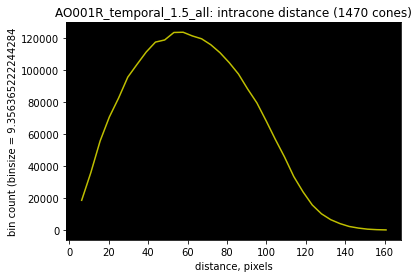

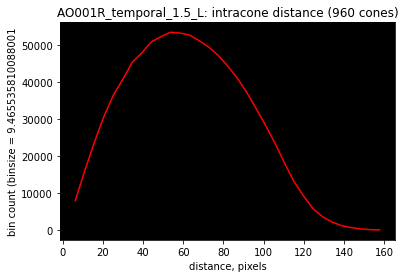

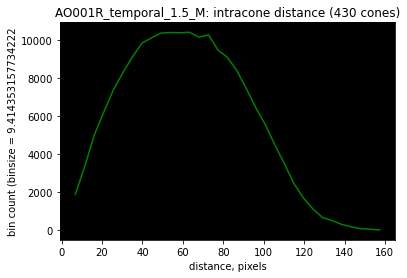

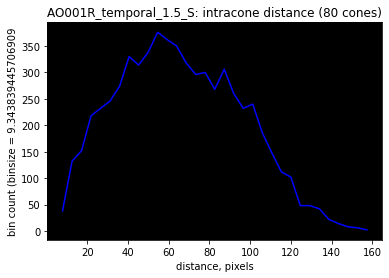

In [2]:
if save_things:
    save_folder = 'Intracone Distance Histograms\\'
    save_path = save_dir + save_folder
    try:
        os.makedir(save_path)
    except:
        print(save_path + " already exists. May overwrite contents.")
    smp.viewIntraconeDistHists(selection, save_things=save_things, save_path=save_path)
else:
    smp.viewIntraconeDistHists(selection)

MONTE CARLO (UNIFORM) - MOSAICS

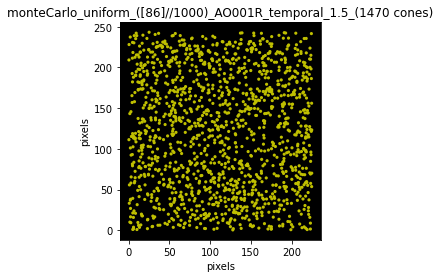

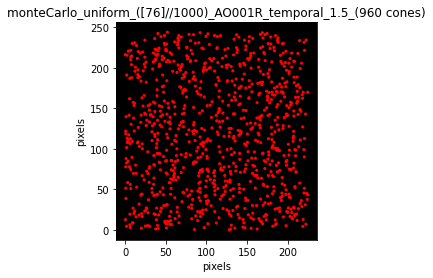

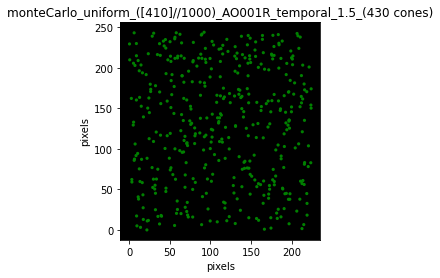

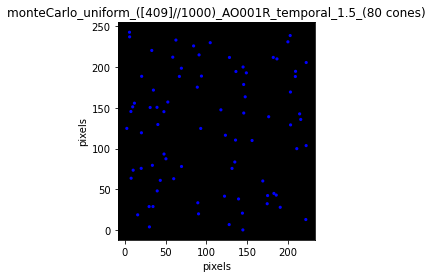

In [11]:
for sav_fl in selection:
    r = np.random.randint(low=0, high=num_mc, size=1)
    smp.viewMonteCarlo([sav_fl], 'uniform', [r])

MONTE CARLO (CONELOCKED) - MOSAICS

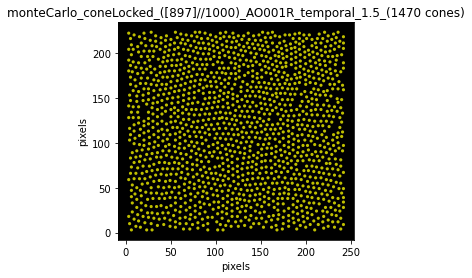

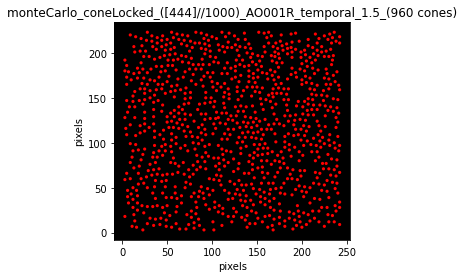

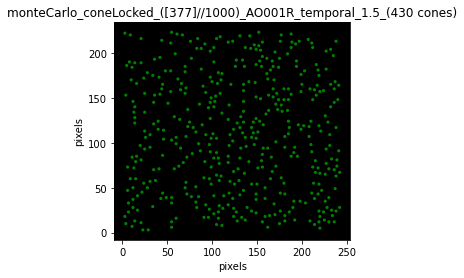

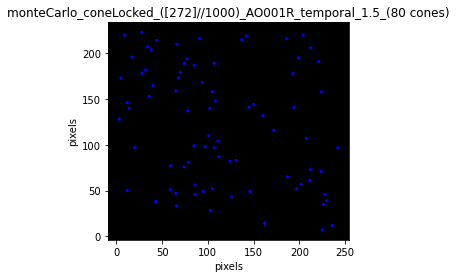

In [5]:
for sav_fl in selection:
    r = np.random.randint(low=0, high=num_mc, size=1)
    smp.viewMonteCarlo([sav_fl], 'coneLocked', [r])

MONTE CARLO (UNIFORM) - INTRACONE DISTANCES (STATS)

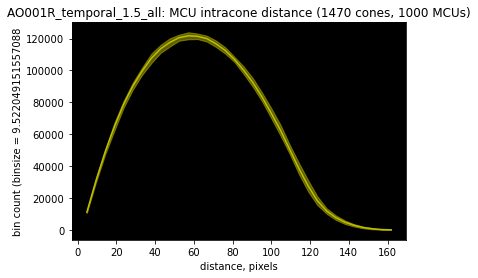

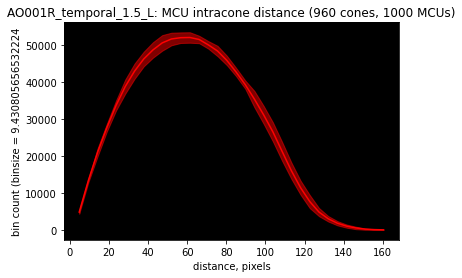

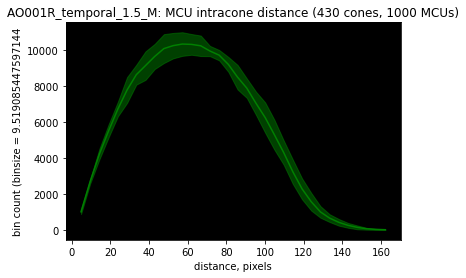

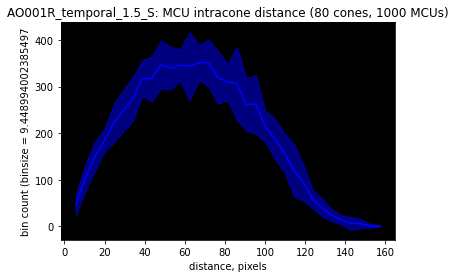

In [6]:
smp.viewMonteCarloStats(selection, 'uniform', 2)

MONTE CARLO (CONELOCKED) - INTRACONE DISTANCES (STATS)

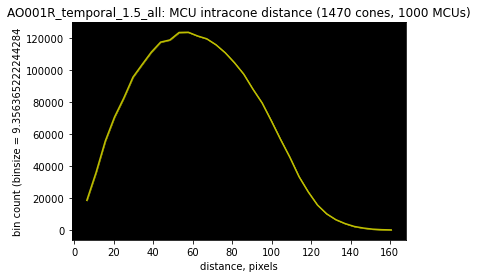

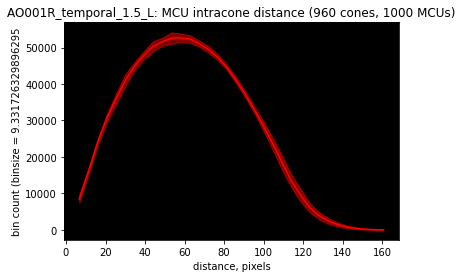

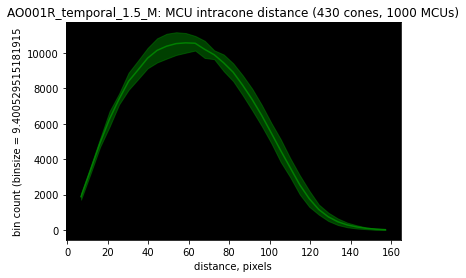

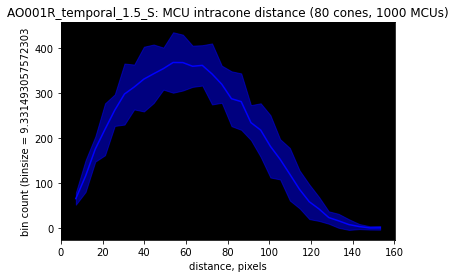

In [7]:
smp.viewMonteCarloStats(selection, 'coneLocked', 2)

MONTE CARLO MCU NORMED

ValueError: x and y must have same first dimension, but have shapes (33,) and (34,)

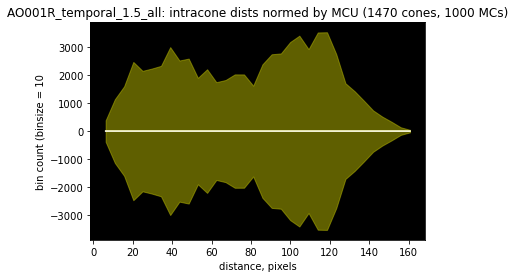

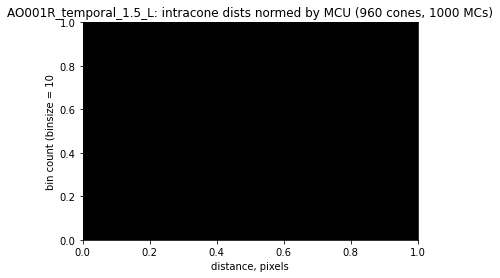

In [13]:
smp.viewMCUnormed(selection, 2)

PRINT A SAVE FILE'S CONTENTS

In [ ]:
flsyst.printSaveFile(save_name[0])